### IMPORTING LIBRARIES

In [241]:
import pandas as pd
import xarray as xr
import netCDF4 as nc
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature


In [189]:
from scipy.stats.stats import pearsonr

In [190]:
import cartopy.io.shapereader as shapereader

### READING THE DATA 

In [9]:
# reading data
ds_J2= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2002.nc')

In [10]:
ds_J2

<xarray.Dataset>
Dimensions:   (lon: 11, lat: 6, datetime: 365)
Coordinates:
  * lon       (lon) float32 -78.5 -78.25 -78.0 -77.75 ... -76.5 -76.25 -76.0
  * lat       (lat) float32 19.0 18.75 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2002-12-31
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6

In [11]:
ds_J3= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2003.nc')

In [12]:
ds_J3

<xarray.Dataset>
Dimensions:   (lon: 11, lat: 6, datetime: 365)
Coordinates:
  * lon       (lon) float32 -78.5 -78.25 -78.0 -77.75 ... -76.5 -76.25 -76.0
  * lat       (lat) float32 19.0 18.75 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6

In [13]:
ds_J4= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2004.nc')

In [14]:
ds_J5= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2005.nc')

In [15]:
ds_J6= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2006.nc')

In [16]:
ds_J7= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2007.nc')

In [17]:
ds_J8= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2008.nc')

In [18]:
ds_J9= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2009.nc')

In [19]:
ds_J10= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2010.nc')

In [20]:
ds_J11= xr.open_dataset('PERSIANN_Jamaica_2023-04-20112019am_2011.nc')

In [21]:
ds_J11

<xarray.Dataset>
Dimensions:   (lon: 11, lat: 6, datetime: 365)
Coordinates:
  * lon       (lon) float32 -78.5 -78.25 -78.0 -77.75 ... -76.5 -76.25 -76.0
  * lat       (lat) float32 19.0 18.75 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2011-12-31
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6

### MERGING ALL THE DATA INTO ONE FILE

In [35]:

Jamaica =xr.open_mfdataset('C:/Users/WINFRED VORDOAGU/Desktop/PYTHON/proj/*.nc')

In [353]:
ja=Jamaica.where(Jamaica !=-99.0 )

In [354]:
ja

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 6, lon: 11)
Coordinates:
  * lon       (lon) float32 -78.5 -78.25 -78.0 -77.75 ... -76.5 -76.25 -76.0
  * lat       (lat) float32 19.0 18.75 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
Data variables:
    crs       (datetime) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 6, 11), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

<AxesSubplot:xlabel='datetime,lat,lon'>

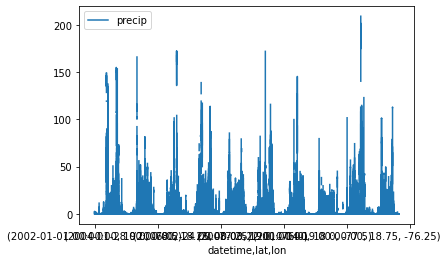

In [215]:
#Checking if my data contain values
ja.precip.to_dataframe().plot()

In [89]:
#Assigning specific year and month names
year=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

#### 1.COMPUTING THE MONTHLY RAINFALL TOTALS AND CLIMATOLOGIES FOR EACH MONTH

In [211]:
# monthlyclimatology rainfall for the months
mon_clim=ja.groupby('datetime.month').mean()
a=mon_clim.precip.sel(lon=-77.25 ,lat=18.25 )




In [212]:
# monthly total rainfall
mon_cli=ja.groupby('datetime.month').sum()
a=mon_cli.precip.sel(lon=-77.25 ,lat=18.25 )


### 2. TMESERIES OF THE ANNUAL TOTALS AND AVERAGES 

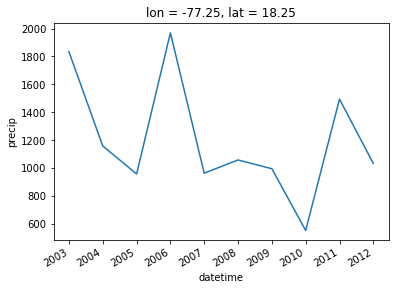

In [448]:
yr_totals.plot()

In [445]:
# data.resample(time=M).sum(time).groupby(time.month).mean(time)
yr_totals =ja.resample(datetime='1Y').sum('datetime')
yr_avg=yr_totals.groupby('datetime.year').mean('datetime')

Text(0, 0.5, 'PRECIPITATION')

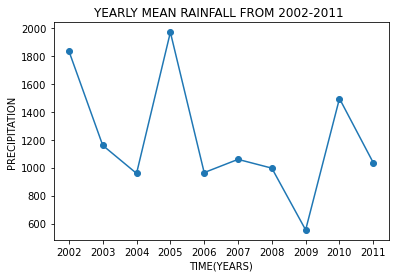

In [446]:
# annual climatology rainfall
#yr_clim =ja.resample(datetime='Y').sum('datetime').groupby('datetime.year').mean('datetime')

plt.plot(year,yr_avg,marker='o')
plt.title('YEARLY MEAN RAINFALL FROM 2002-2011 ')
plt.xlabel('TIME(YEARS)')
plt.ylabel('PRECIPITATION')

Text(0, 0.5, 'PRECIPITATION(mm)')

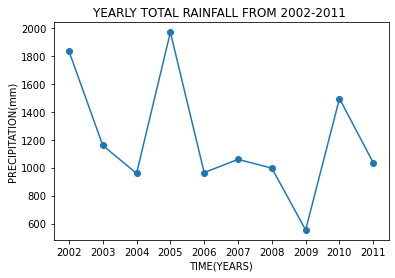

In [437]:
# yearly total rainfall
yr_cli=ja.groupby('datetime.year').sum('datetime')
b=yr_cli
plt.plot(year,b,marker='o')
plt.title('YEARLY TOTAL RAINFALL FROM 2002-2011 ')
plt.xlabel('TIME(YEARS)')
plt.ylabel('PRECIPITATION(mm)')

#### 3.COMPUTING NUMBER OF DRY AND WET DAYS AND REPRESENTING IT ON SPATIAL AND TIME SERIES PLOTS (MONTHLY AND YEARLY)

In [ ]:
ja=Jamaica.where(Jamaica !=-99.0 )

In [ ]:
ja

In [178]:
# Computing number of dry and wet days
dry_days = ja.where(ja < 1)
wet_days = ja.where(ja >= 1)

In [179]:
# Compute monthly dry and wet days
monthly_dry_days = dry_days.precip.groupby('datetime.month').mean('datetime').sel(lon=-77.25,lat=18.25)
monthly_wet_days = wet_days.precip.groupby('datetime.month').mean('datetime').sel(lon=-77.25,lat=18.25)

In [180]:
# Compute annual dry and wet days
annual_dry_days = dry_days.precip.groupby('datetime.year').mean('datetime').sel(lon=-77.25,lat=18.25)
annual_wet_days = wet_days.precip.groupby('datetime.year').mean('datetime').sel(lon=-77.25,lat=18.25)

In [112]:
monthly_dry_days

<xarray.DataArray 'precip' (month: 12)>
dask.array<getitem, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -77.25
    lat      float32 18.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


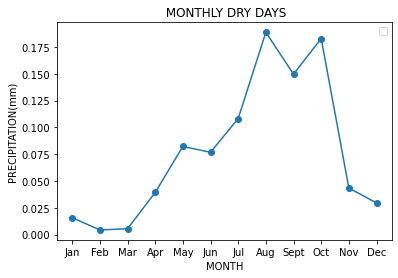

In [115]:
# Plot monthly dry days
plt.plot(month,monthly_dry_days, marker='o')
plt.xlabel('MONTH')
plt.ylabel('PRECIPITATION(mm)')
plt.title(' MONTHLY DRY DAYS')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


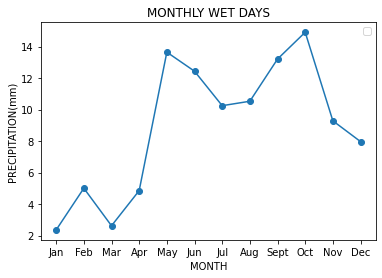

In [121]:
# Plot monthly wet days
plt.plot(month,monthly_wet_days, marker='o')
plt.xlabel('MONTH')
plt.ylabel('PRECIPITATION(mm)')
plt.title('MONTHLY WET DAYS')
plt.legend()

Text(0.5, 1.0, ' ANNUAL DRY DAYS WITH PRECIP < 1mm')

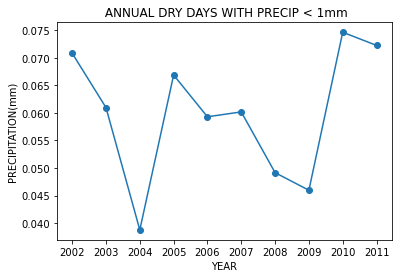

In [167]:
# Plot annual dry  days
plt.plot(year,annual_dry_days, marker='o')
plt.xlabel('YEAR')
plt.ylabel('PRECIPITATION(mm)')
plt.title(' ANNUAL DRY DAYS WITH PRECIP < 1mm')
#plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


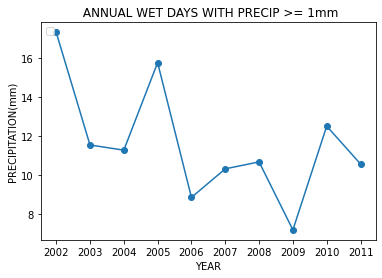

In [125]:
# Plot annual wet days
plt.plot(year,annual_wet_days, marker='o')
plt.xlabel('YEAR')
plt.ylabel('PRECIPITATION(mm)')
plt.title(' ANNUAL WET DAYS WITH PRECIP >= 1mm')
plt.legend(loc='upper left')

In [181]:
dry_days_spa = ja.where(ja < 1)
wet_days_spa = ja.where(ja >= 1)


In [185]:
dry_days_spa=dry_days_spa.precip

In [254]:
#computation for monthly dry
monthly_dry_days_spa = dry_days_spa.groupby('datetime.month').count('datetime')
monthly_dry_days_spa.sel(lat=slice(18.50,17.75), lon=slice(-78.25,-76.10))#.plot(col_wrap=3, col='month',label=' MONTHLY DRY DAYS')


<xarray.DataArray 'precip' (month: 12, lat: 4, lon: 9)>
dask.array<getitem, shape=(12, 4, 9), dtype=int32, chunksize=(1, 4, 9), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -78.25 -78.0 -77.75 -77.5 ... -76.75 -76.5 -76.25
  * lat      (lat) float32 18.5 18.25 18.0 17.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

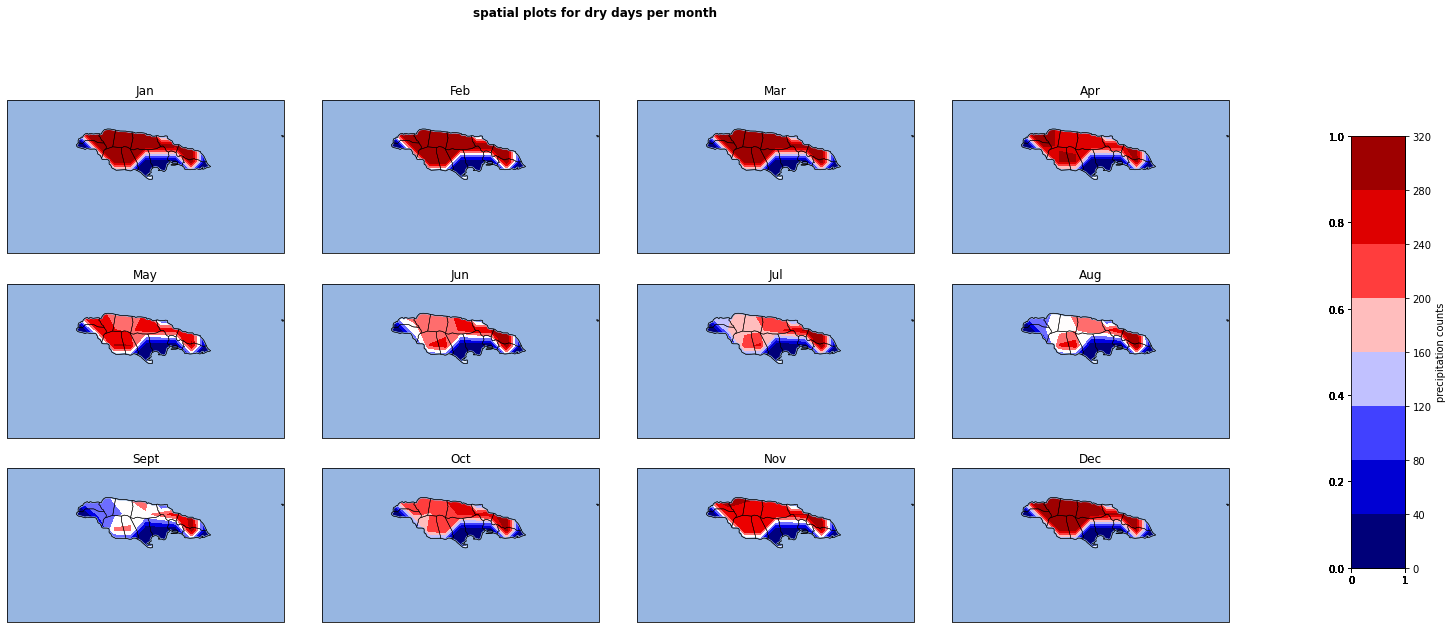

In [425]:
#monthly spatial plot for dry days(RR<1mm)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN,linewidth=2)
       # ax[i].add_feature(cfeature.LAKES,linewidth=2 color='blue')
        #    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-79.5, -75.0, 16.5, 19.0])
        
    ax[i].set_title(month_names[i])
    cb=ax[i].contourf(monthly_dry_days_spa.lon,monthly_dry_days_spa.lat,monthly_dry_days_spa[i],cmap='seismic',transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(cb,cax=color_bar,label='precipitation counts')
plt.subplots_adjust(wspace=-0.30,top=0.85)
plt.suptitle('spatial plots for dry days per month',fontweight='bold')
plt.savefig('dry days per month.png')

In [291]:
#computation for monthly wet days(RR>=1mm)
monthly_wet_days_spa = wet_days_spa.groupby('datetime.month').count('datetime')
monthly_wet_days_spa.sel(lat=slice(18.50,17.75), lon=slice(-78.25,-76.10))#.plot(col_wrap=3, col='month',label=' MONTHLY DRY DAYS')


<xarray.DataArray 'precip' (month: 12, lat: 4, lon: 9)>
dask.array<getitem, shape=(12, 4, 9), dtype=int32, chunksize=(1, 4, 9), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -78.25 -78.0 -77.75 -77.5 ... -76.75 -76.5 -76.25
  * lat      (lat) float32 18.5 18.25 18.0 17.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

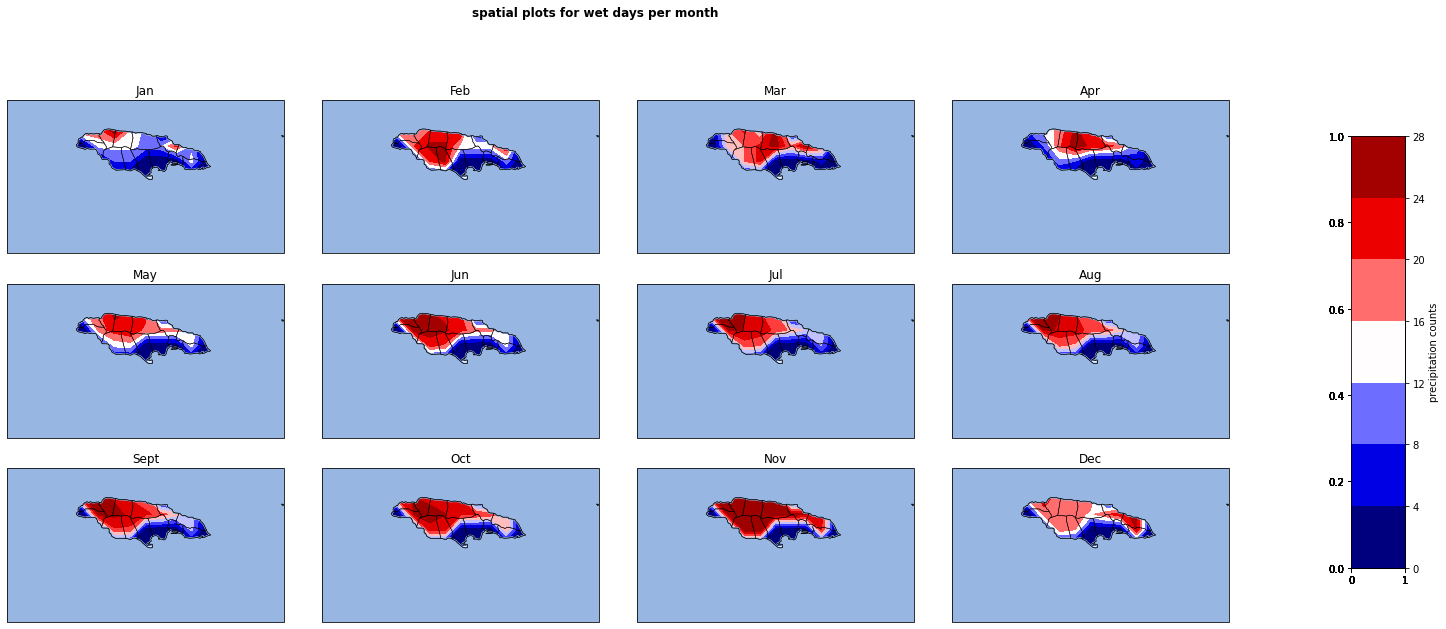

In [424]:
#monthly spatial plot for wet days(RR>=1mm)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN,linewidth=2)
       # ax[i].add_feature(cfeature.LAKES,linewidth=2 color='blue')
        #    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-79.5, -75.0, 16.5, 19.0])
        
    ax[i].set_title(month_names[i])
    cb=ax[i].contourf(monthly_wet_days_spa.lon,monthly_wet_days_spa.lat,monthly_wet_days_spa[i],cmap='seismic',transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(cb,cax=color_bar,label='precipitation counts')
plt.subplots_adjust(wspace=-0.30,top=0.85)
plt.suptitle('spatial plots for wet days per month',fontweight='bold')
plt.savefig('wet days per month.png')

In [309]:
#computation for yearly wet days(RR>=1mm)
annual_wet_days_spa = wet_days_spa.groupby('datetime.year').count('datetime')
annual_wet_days_spa.sel(lat=slice(18.50,17.75), lon=slice(-78.25,-76.10))#.plot(col_wrap=3, col='month',label=' MONTHLY DRY DAYS')


<xarray.DataArray 'precip' (year: 10, lat: 4, lon: 9)>
dask.array<getitem, shape=(10, 4, 9), dtype=int32, chunksize=(1, 4, 9), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -78.25 -78.0 -77.75 -77.5 ... -76.75 -76.5 -76.25
  * lat      (lat) float32 18.5 18.25 18.0 17.75
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011

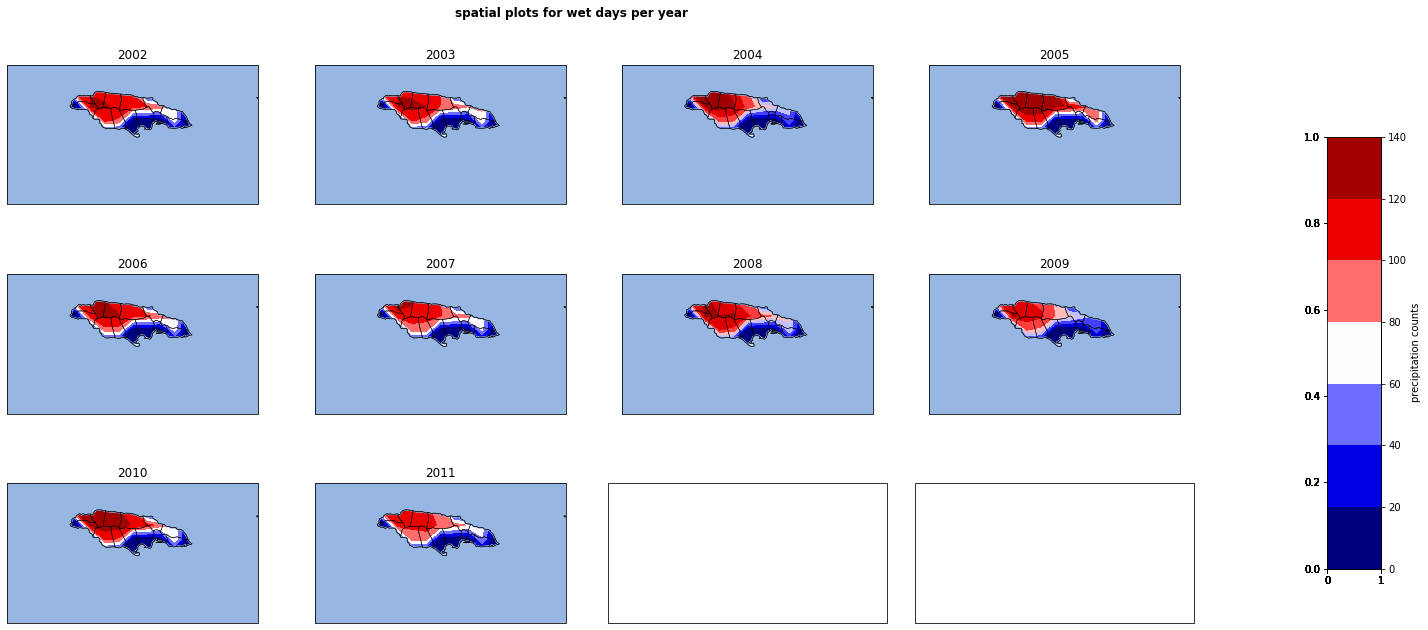

In [423]:
#yearly spatial plot for wet days(RR>=1mm)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
year_names=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN,linewidth=2)
       # ax[i].add_feature(cfeature.LAKES,linewidth=2 color='blue')
        #    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-79.5, -75.0, 16.5, 19.0])
        
    ax[i].set_title(year_names[i])
    cb=ax[i].contourf(annual_wet_days_spa.lon,annual_wet_days_spa.lat,annual_wet_days_spa[i],cmap='seismic',transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(cb,cax=color_bar,label='precipitation counts')
plt.subplots_adjust(wspace=-0.35,hspace=0.5,top=0.9)
plt.suptitle('spatial plots for wet days per year',fontweight='bold')
plt.savefig('wet days per year.png')

In [310]:
#computation for yearly wet days(RR<1mm)
annual_dry_days_spa = dry_days_spa.groupby('datetime.year').count('datetime')
annual_dry_days_spa.sel(lat=slice(18.50,17.75), lon=slice(-78.25,-76.10))#.plot(col_wrap=3, col='month',label=' MONTHLY DRY DAYS')


<xarray.DataArray 'precip' (year: 10, lat: 4, lon: 9)>
dask.array<getitem, shape=(10, 4, 9), dtype=int32, chunksize=(1, 4, 9), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -78.25 -78.0 -77.75 -77.5 ... -76.75 -76.5 -76.25
  * lat      (lat) float32 18.5 18.25 18.0 17.75
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011

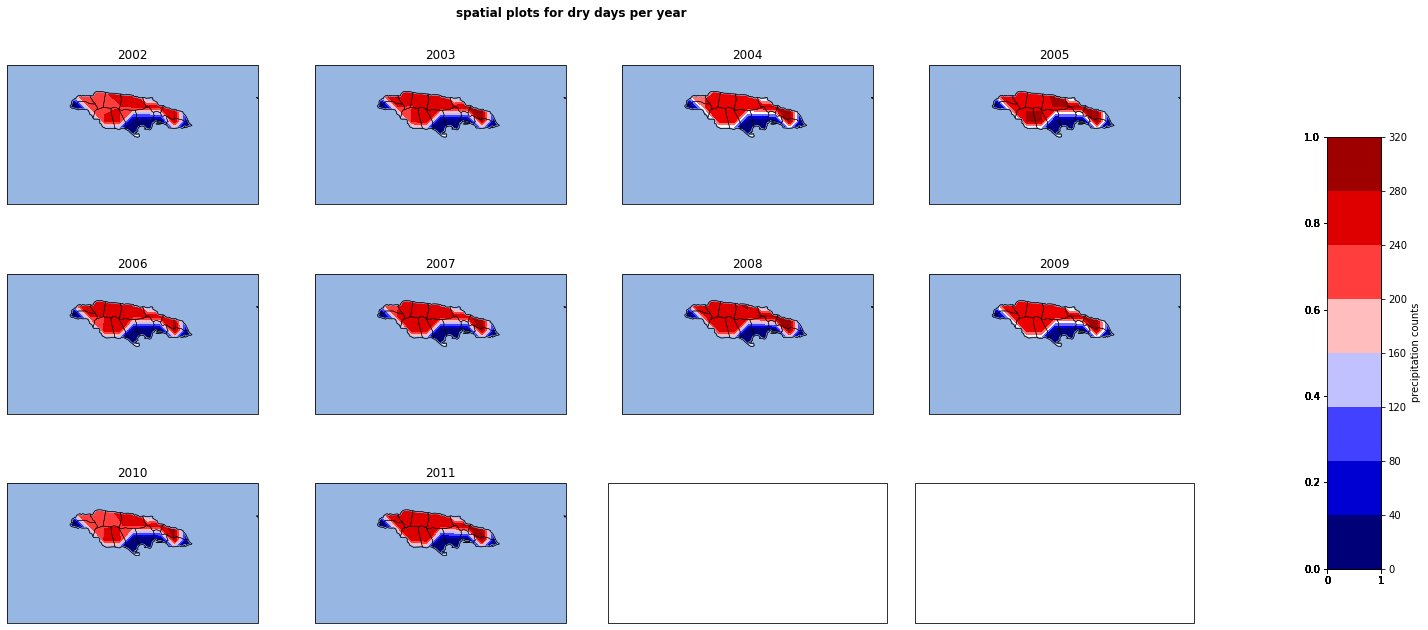

In [422]:
#yearly spatial plot for dry days(RR<1mm)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
year_names=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN,linewidth=2)
       # ax[i].add_feature(cfeature.LAKES,linewidth=2 color='blue')
        #    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-79.5, -75.0, 16.5, 19.0])
        
    ax[i].set_title(year_names[i])
    cb=ax[i].contourf(annual_dry_days_spa.lon,annual_dry_days_spa.lat,annual_dry_days_spa[i],cmap='seismic',transform=ccrs.PlateCarree(),zorder=-2,vmin=0)
    color_bar=fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(cb,cax=color_bar,label='precipitation counts')
plt.subplots_adjust(wspace=-0.35,hspace=0.5,top=0.9)
plt.suptitle('spatial plots for dry days per year',fontweight='bold')
plt.savefig('dry days per year.png')

# alternative method

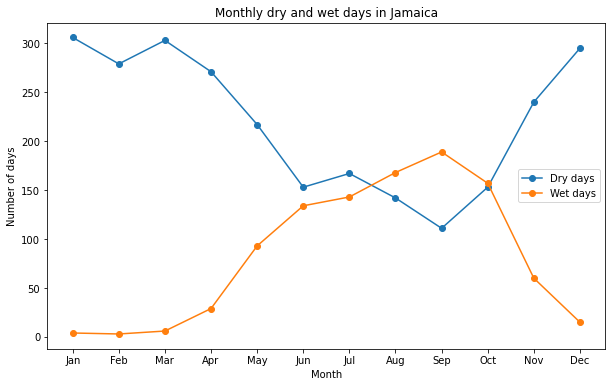

In [410]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import xarray as xr

# Load data
#j= xr.#open_dataset('jamaica.nc'

# Remove missing values
#ja=Jamaica.where(Jamaica !=-99.0 )

# Compute number of dry and wet days
dry_days = ja.where(ja < 1)
wet_days = ja.where(ja >= 1)

# Compute monthly dry and wet days
monthly_dry_days = dry_days.groupby('datetime.month').count(dim='datetime')#.sel(lon=-77.25, lat=18.25)
monthly_wet_days = wet_days.groupby('datetime.month').count(dim='datetime')#.sel(lon=-77.25, lat=18.25)

# Compute annual dry and wet days
annual_dry_days = dry_days.groupby('datetime.year').count(dim='datetime')#.sel(lon=-77.25, lat=18.25)
annual_wet_days = wet_days.groupby('datetime.year').count(dim='datetime')#.sel(lon=-77.25, lat=18.25)

# Plot monthly dry and wet days
fig,ax = plt.subplots(figsize=(10,6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_dry_days, marker='o', label='Dry days')
plt.plot(month_names, monthly_wet_days, marker='o', label='Wet days')
plt.xlabel('Month')
plt.ylabel('Number of days')
plt.title('Monthly dry and wet days in Jamaica')
plt.legend()

# Plot annual dry and wet days
# years = annual_dry_days['year'].values
# plt.plot(years, annual_dry_days, marker='o', label='Dry days')
# plt.plot(years, annual_wet_days, marker='o', label='Wet days')
# plt.xlabel('Year')
# plt.ylabel('Number of days')
# plt.title('Annual dry and wet days in Jamaica')
# plt.legend()

# # Compute monthly dry days spatially
# monthly_dry_days_spa = dry_days.groupby('datetime.month').count(dim='datetime')
# monthly_dry_days_spa = monthly_dry_days_spa.sel(lat=slice(18.50, 17.75), lon=slice(-78.25, -76.10))

# # Plot monthly dry days spatially
# fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# for i, ax in enumerate(axs.flatten()):
#     ax.set_extent([-78.25, -76.10, 17.75, 18.50], crs=ccrs.PlateCarree())
#     ax.add_feature(cfeature.COASTLINE)
#     ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.STATES)
#     ax.add_feature(cfeature.OCEAN)
#     ax.set_title(month_names[i])
#     im = monthly_dry_days_spa[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False)
#     cb = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
#     cb.set_label('Number of dry days')
    
# plt.tight_layout()
# plt.show()


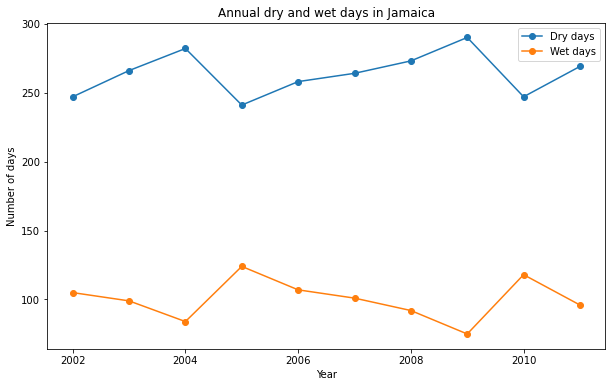

In [409]:
#Plot annual dry and wet days
fig,ax = plt.subplots(figsize=(10,6))
years = annual_dry_days['year'].values
plt.plot(years, annual_dry_days, marker='o', label='Dry days')
plt.plot(years, annual_wet_days, marker='o', label='Wet days')
plt.xlabel('Year')
plt.ylabel('Number of days')
plt.title('Annual dry and wet days in Jamaica')
plt.legend()

In [ ]:
# Compute monthly dry days spatially
monthly_dry_days_spa = dry_days.groupby('datetime.month').count(dim='datetime')
monthly_dry_days_spa = monthly_dry_days_spa.sel(lat=slice(18.50, 17.75), lon=slice(-78.25, -76.10))

# Plot monthly dry days spatially
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
 for i, ax in enumerate(axs.flatten()):
ax.set_extent([-78.25, -76.10, 17.75, 18.50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
#     ax.add_feature(cfeature.OCEAN)
#     ax.set_title(month_names[i])
#     im = monthly_dry_days_spa[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False)
#     cb = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
#     cb.set_label('Number of dry days')
    
# plt.tight_layout()
# plt.show()


#### 4. EXTREME RAINFALL INDICES (RR>10mm;RR>20mm)

In [355]:
ja=ja.precip#.sel(lon=-77.25,lat=18.25)
ja   

<xarray.DataArray 'precip' (datetime: 3652, lat: 6, lon: 11)>
dask.array<where, shape=(3652, 6, 11), dtype=float32, chunksize=(366, 6, 11), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -78.5 -78.25 -78.0 -77.75 ... -76.5 -76.25 -76.0
  * lat       (lat) float32 19.0 18.75 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
Attributes:
    grid_mapping:  crs

In [358]:
extreme_10mm =ja.where(ja > 10)
extreme_20mm = ja.where(ja > 20)

monthly_extreme_10mm = extreme_10mm.groupby('datetime.month').count('datetime')
monthly_extreme_20mm = extreme_20mm.groupby('datetime.month').count('datetime')

annual_extreme_10mm = extreme_10mm.groupby('datetime.year').count('datetime')
annual_extreme_20mm = extreme_20mm.groupby('datetime.year').count('datetime')


TIMESERIES FOR MONTHLY EXTREME 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


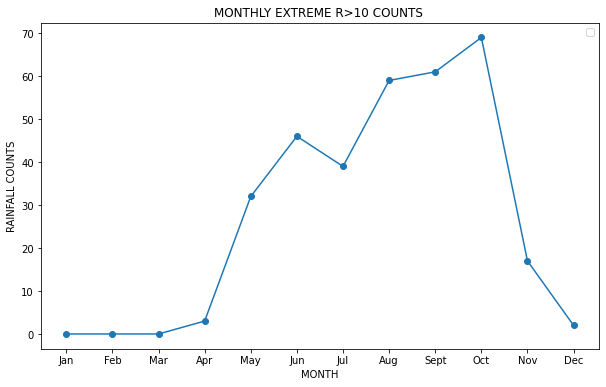

In [344]:
#monthy rr>10mm
fig,ax = plt.subplots(figsize=(10,6))
#plt.sublots_adjust(hspace=0.5, wspace=0.2)
plt.plot(month,monthly_extreme_10mm, marker='o' )
#plt.plot(year,annual_extreme,marker='o', label='precipitation')
plt.xlabel('MONTH')
plt.ylabel('RAINFALL COUNTS')
plt.title('MONTHLY EXTREME R>10 COUNTS ')
plt.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


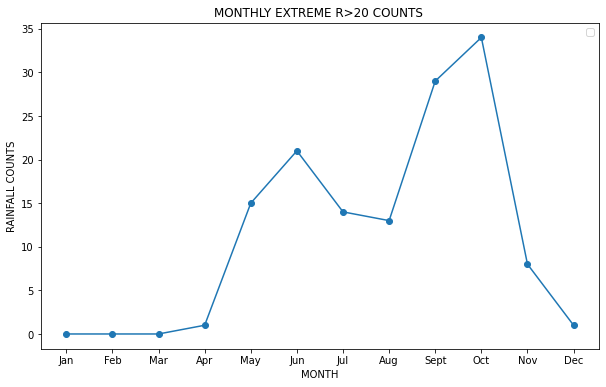

In [345]:
fig,ax = plt.subplots(figsize=(10,6))
#plt.sublots_adjust(hspace=0.5, wspace=0.2)
plt.plot(month,monthly_extreme_20mm, marker='o' )
#plt.plot(year,annual_extreme,marker='o', label='precipitation')
plt.xlabel('MONTH')
plt.ylabel('RAINFALL COUNTS')
plt.title('MONTHLY EXTREME R>20 COUNTS ')
plt.legend(loc='upper right')

In [ ]:
TIMESERIES FOR YEARLY EXTREME

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


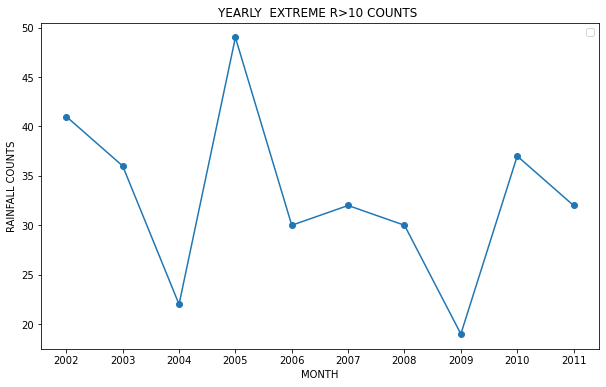

In [346]:
fig,ax = plt.subplots(figsize=(10,6))
#plt.sublots_adjust(hspace=0.5, wspace=0.2)
plt.plot(year,annual_extreme_10mm, marker='o' )
#plt.plot(year,annual_extreme,marker='o', label='precipitation')
plt.xlabel('MONTH')
plt.ylabel('RAINFALL COUNTS')
plt.title('ANNUAL  EXTREME R>10 COUNTS ')
plt.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


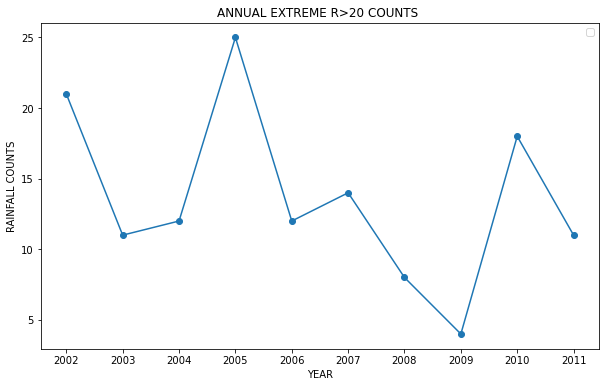

In [347]:
fig,ax = plt.subplots(figsize=(10,6))
#plt.sublots_adjust(hspace=0.5, wspace=0.2)
plt.plot(year,annual_extreme_20mm, marker='o' )
#plt.plot(year,annual_extreme,marker='o', label='precipitation')
plt.xlabel('YEAR')
plt.ylabel('RAINFALL COUNTS')
plt.title('ANNUAL EXTREME R>20 COUNTS ')
plt.legend(loc='upper right')

In [ ]:
SPATIAL FOR MONTHLY EXTREME

In [357]:
ja

<xarray.DataArray 'precip' (datetime: 3652, lat: 6, lon: 11)>
dask.array<where, shape=(3652, 6, 11), dtype=float32, chunksize=(366, 6, 11), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -78.5 -78.25 -78.0 -77.75 ... -76.5 -76.25 -76.0
  * lat       (lat) float32 19.0 18.75 18.5 18.25 18.0 17.75
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
Attributes:
    grid_mapping:  crs

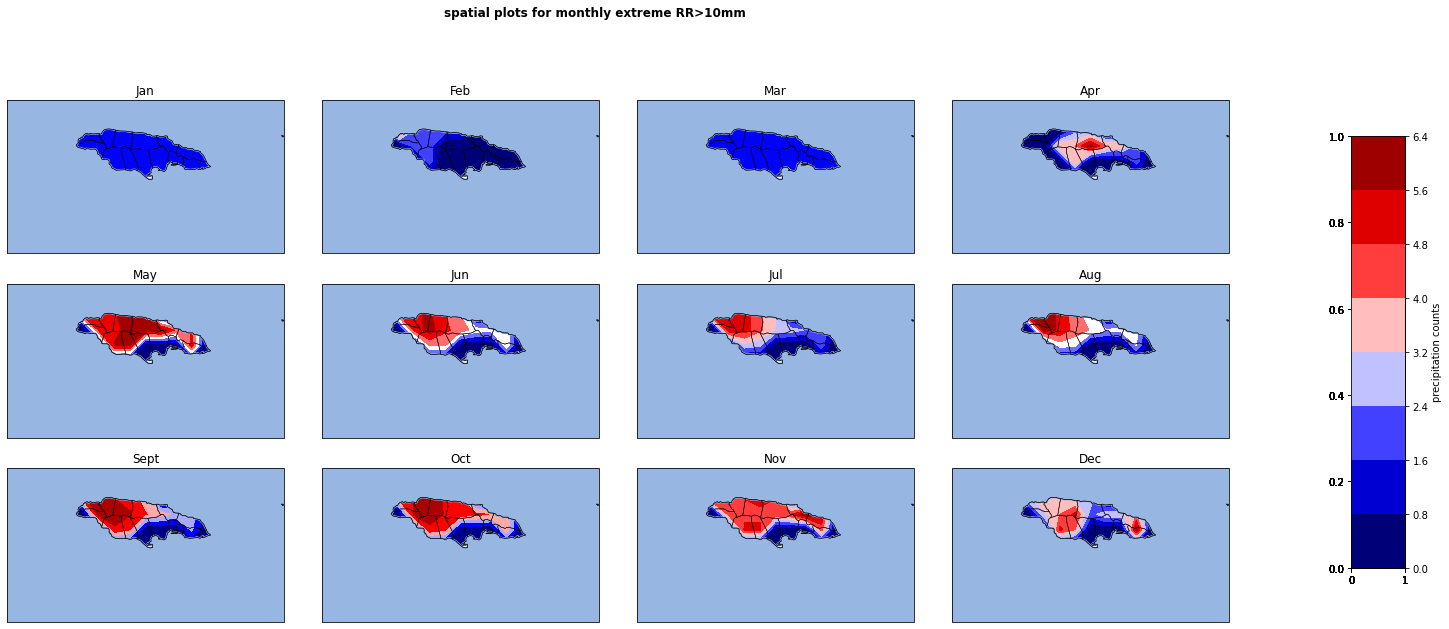

In [421]:
#monthly spatial plot for extreme(RR>10mm)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN,linewidth=2)
       # ax[i].add_feature(cfeature.LAKES,linewidth=2 color='blue')
        #    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-79.5, -75.0, 16.5, 19.0])
        
    ax[i].set_title(month_names[i])
    cb=ax[i].contourf(monthly_extreme_10mm.lon,monthly_extreme_10mm.lat,monthly_extreme_10mm[i],cmap='seismic',transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(cb,cax=color_bar,label='precipitation counts')
plt.subplots_adjust(wspace=-0.30,top=0.85)
plt.suptitle('spatial plots for monthly extreme RR>10mm',fontweight='bold')
plt.savefig('extreme per month.png')

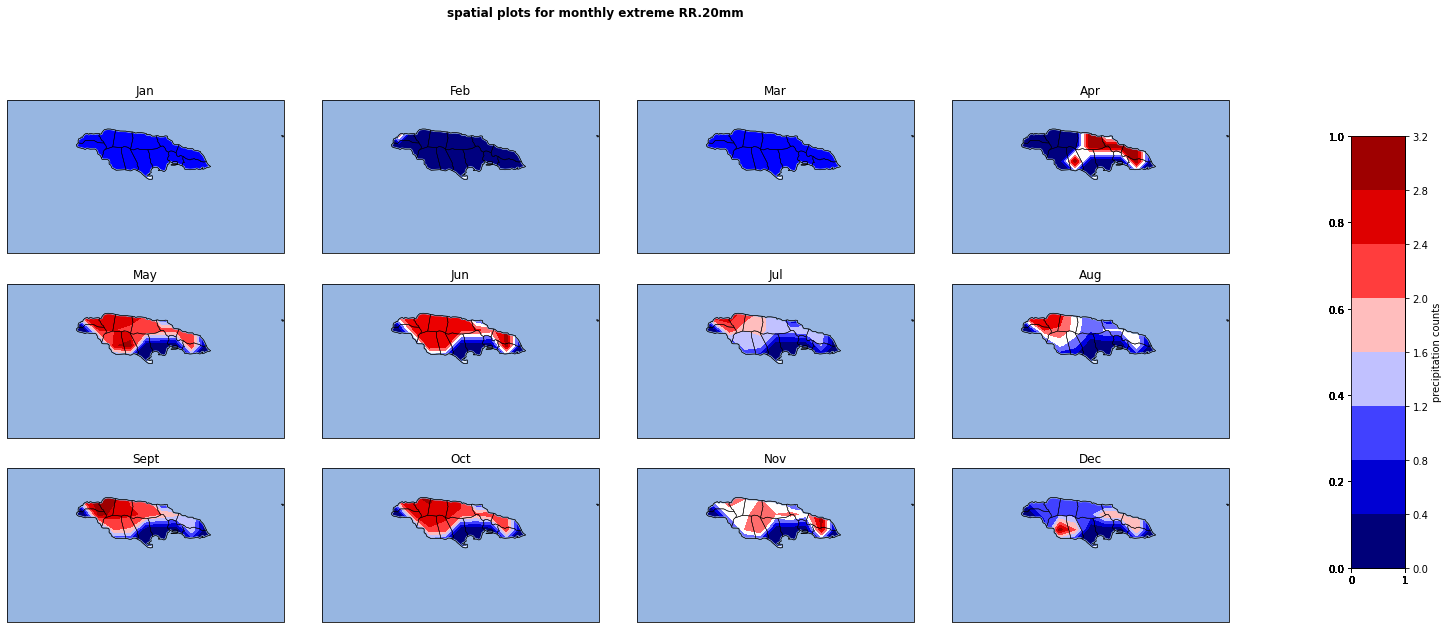

In [420]:
#monthly spatial plot for extreme(RR>20mm)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN,linewidth=2)
       # ax[i].add_feature(cfeature.LAKES,linewidth=2 color='blue')
        #    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-79.5, -75.0, 16.5, 19.0])
        
    ax[i].set_title(month_names[i])
    cb=ax[i].contourf(monthly_extreme_20mm.lon,monthly_extreme_20mm.lat,monthly_extreme_20mm[i],cmap='seismic',transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(cb,cax=color_bar,label='precipitation counts')
plt.subplots_adjust(wspace=-0.30,top=0.85)
plt.suptitle('spatial plots for monthly extreme RR.20mm',fontweight='bold')
plt.savefig('extreme per month.png')

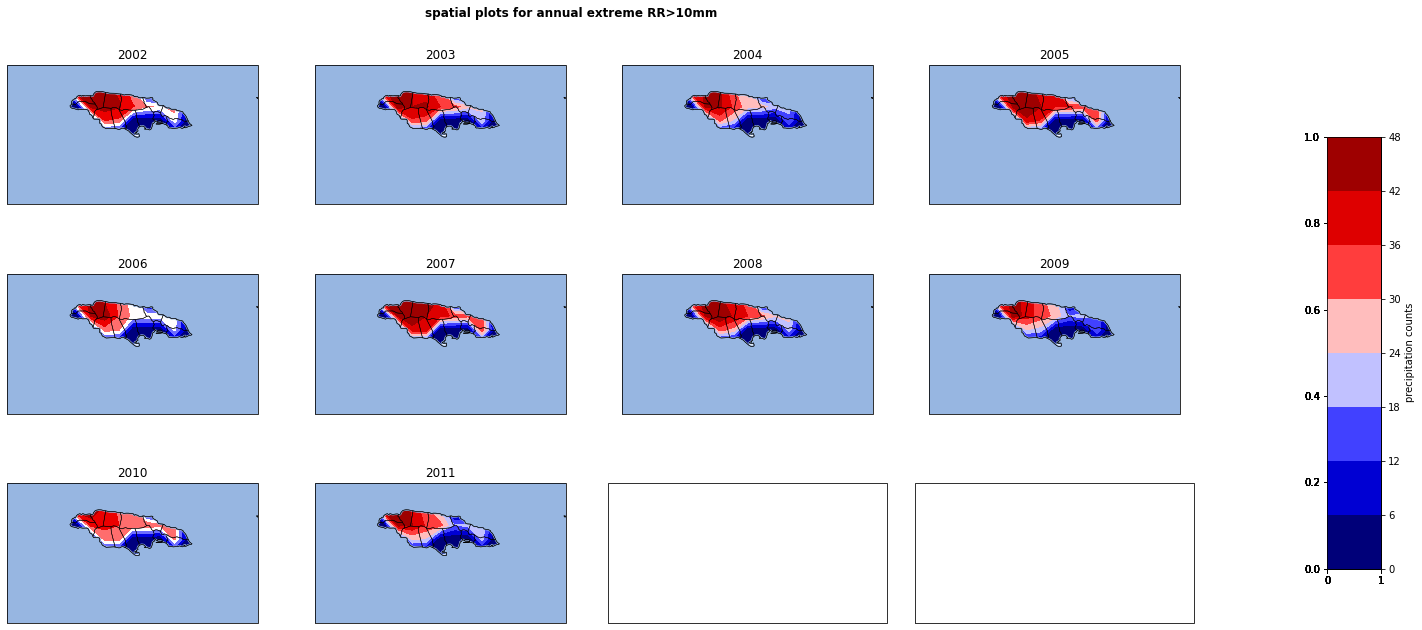

In [413]:
#yearly spatial plot for extreme(RR>10mm)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN,linewidth=2)
       # ax[i].add_feature(cfeature.LAKES,linewidth=2 color='blue')
        #    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-79.5, -75.0, 16.5, 19.0])
        
    ax[i].set_title(year_names[i])
    cb=ax[i].contourf(annual_extreme_10mm.lon,annual_extreme_10mm.lat,annual_extreme_10mm[i],cmap='seismic',transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(cb,cax=color_bar,label='precipitation counts')
plt.subplots_adjust(wspace=-0.35,hspace=0.5,top=0.9)
plt.suptitle('spatial plots for annual extreme RR>10mm',fontweight='bold')
plt.savefig('extreme per year.png')

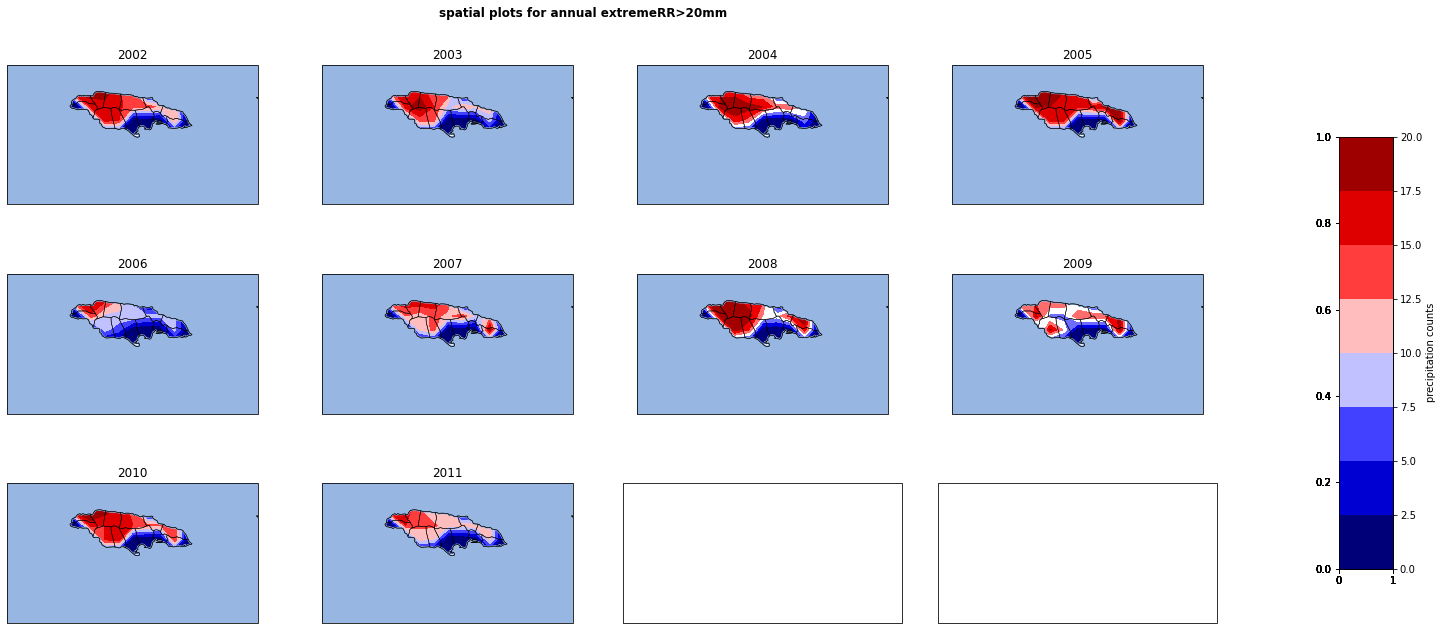

In [419]:
#yearly spatial plot for extreme(RR>20mm)
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN,linewidth=2)
       # ax[i].add_feature(cfeature.LAKES,linewidth=2 color='blue')
        #    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-79.5, -75.0, 16.5, 19.0])
        
    ax[i].set_title(year_names[i])
    cb=ax[i].contourf(annual_extreme_20mm.lon,annual_extreme_20mm.lat,annual_extreme_20mm[i],cmap='seismic',transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(cb,cax=color_bar,label='precipitation counts')
plt.subplots_adjust(wspace=-0.3,hspace=0.5,top=0.9)
plt.suptitle('spatial plots for annual extremeRR>20mm',fontweight='bold')
plt.savefig('extreme per year.png')

# THE END